# [SWCON253] Machine Learning
Teaching Assistant: Yeongwoong Kim (duddnd7575@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P1:  Linear/Polynomial Regression Model (10점)

### 학습목표
- 실습에 필요한 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해한다.
- Pure python으로 작성된 Linear Regression Model을 분석하고 이해한다.
- Pure python으로 Polynomial Regression Model class를 직접 작성하고 분석한다.

### 실습내용

실습은 다음 순서로 진행됩니다.
학생분들께서는 **<구현>**과 **<작성>**에 해당하는 부분을 수행해주시면 됩니다.

- S1. Linear Regression Model 구현 및 분석
    - 1) 패키지 import
    - 2) 데이터셋 생성
    - 3) Linear Regression Model 구현
    - 4) 학습 및 결과 시각화

<br>

- S2. Polynomial Regression Model 구현 및 분석
    - 1) Polynomial Regression Model 구현 **<구현>** 
    - 2) 학습 및 결과 시각화
    - 3) Polynomial Regression Model 분석 **<구현>** 

<br>

- S3. Discussion **<작성>**


--- 

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록 합니다.


### 점수
- 2-1) Polynomial regression model class 구현: **4점**
- 2-3) Polynomial Regression Model 분석: **4점**
- Discussion: **2점**

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> Download/export as -> HTML)도 함께 제출하세요. 하나만 제출할시 2점 감점이 있습니다.

---

## S1. Linear regression model 분석

S1에서는 2차원 평면 상의 데이터에 대하여 해당 데이터를 잘 표현할 수 있는 선형 회귀 모델(Linear Regression Model)을 학습하고 평가합니다.

### 1-1) Import packages
**수정하지 마세요.**

In [1]:
from random import random as rand
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1-2) Loading the Dataset
**수정하지 마세요.** 

학습과 테스트에 사용할 데이터를 생성합니다.

In [2]:
# Random seed
random.seed(1234)

# Generate 2-dimensional data points
X = [rand() * i * 0.5 - 20 for i in range(0, 100)]
y = [x ** 3 * 0.002 - x ** 2 * 0.005 + x * 0.003 + rand() * 5 for x in X]
print(len(X), len(y))

100 100


Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [3]:
# Data random shuffle
idx = list(range(len(X)))
random.shuffle(idx)

# Split data for train/test
X_train, X_test = [X[i] for i in idx[:80]], [X[i] for i in idx[80:]]
y_train, y_test = [y[i] for i in idx[:80]], [y[i] for i in idx[80:]]

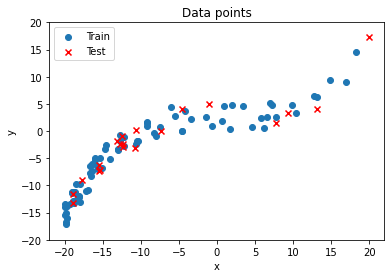

In [4]:
# 학습 데이터를 시간화해서 분포를 확인해보기
plt.scatter([i for idx, i in enumerate(X_train)], 
            [i for idx, i in enumerate(y_train)],
            label='Train', marker='o')

plt.scatter([i for idx, i in enumerate(X_test)], 
            [i for idx, i in enumerate(y_test)],
            label='Test', marker='x', color='r')

plt.title('Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-20, 20])
plt.legend()
plt.show()

### 1-3) Linear Regression Model 구현

**수정하지 마세요.** 

`Linear` class는 생성자, forward, backward, train, evaluation 다섯개 함수로 이루어져 있습니다.
- `__init__` 생성자에서는 model의 weights와 bias를 초기화합니다.
- `forward`에서는 input을 model의 가중치를 이용해서 예측을 수행합니다.
- `backward`에서는 model의 가중치를 학습하기 위해 에러를 계산합니다.
- `train`에서는 model을 학습하는 과정으로 `forward`와 `backward`를 차례로 반복하여 model의 가중치를 업데이트 합니다.
- `evaluation`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다.


In [5]:
import math

class Linear():
    def __init__(self):
        self.weight = rand() # Random initialization
        self.bias = 0 # initialization
        self.lr = 5e-4
        
    def forward(self, x):
        # To compute the weighted sum of Linear regression model
        prediction = self.weight * x  + self.bias
        return prediction
        
    def backward(self, x, y):
        # To compute the prediction error (derivative of L=1/2 * (prediction - y)^2 by prediction)
        pred = self.forward(x) 
        errors = pred - y
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs): # epochs 만큼 학습
            for i in range(len(y)):# Each data point (Online learning)
                x_, y_ = x[i], y[i]
                
                # To calculate gradient of the model by the sample
                errors = self.backward(x_, y_)
                gradient = errors * x_
                
                # To update the weight and bias with backward() 
                self.weight -= gradient * self.lr
                self.bias -= errors * self.lr
                
    def evaluate(self, x):
        # To compute the predictions with forward()
        predictions = [self.forward(x_) for x_ in x]
        return predictions # list type
    

### 1-4) 학습 및 결과 시각화
**수정하지 마세요.**

작성한 `Linear` class와 Trainset을 이용해 1차 선형 회귀 모델을 학습시키고 학습된 모델의 평가 결과를 시각화합니다.

In [6]:
# Define a model
linear = Linear()  #  위에서 구현한 Linear regression model 모델 생성

# Training
linear.train(X_train, y_train, 100)   #  100 epoch 학습

# Print weight and bias
print(f"weight: {linear.weight:0.6f}")
print(f"bias: {linear.bias:0.6f}")

weight: 0.602628
bias: 1.462181


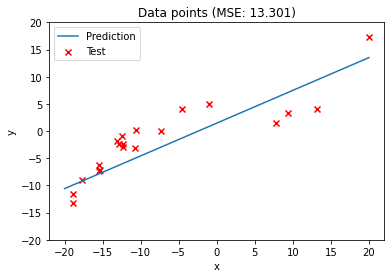

In [7]:
# Range of X
x = np.linspace(-20, 20, 50)

# Plotting linear
plt.plot(x, linear.forward(x), label='Prediction')

# Plotting test data points
plt.scatter([i for idx, i in enumerate(X_test)], 
            [i for idx, i in enumerate(y_test)],
            label='Test', marker='x', color='r')

# Calculate MSE (Mean Square Error) of test data
mse = sum([(y - linear.forward(x))** 2 for x, y in zip(X_test, y_test)]) / len(X_test)

plt.title(f'Data points (MSE: {mse:0.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-20, 20])
plt.legend()
plt.show()

## S2. Polynomial Regression Model

1차 Linear Regression Model은 1차 Polynomial Regression Model과 동일하다고 볼 수 있습니다. 

S2에서는 입력 파라메터에 따라 1차 이상의 차수를 가진 Polynomial Regression Model을 반환하는 `Polynomial` class를 구현합니다.

S1에서 작성된 `Linear` class를 참고하여 구현하시면 됩니다.

`Polynomial` class는 생성자, forward, backward, train, evaluation 다섯개 함수로 이루어져 있습니다.
- `__init__` 생성자에서는 model의 weights와 bias를 초기화합니다.
- `forward`에서는 input을 model의 가중치를 이용해서 예측을 수행합니다.
- `backward`에서는 model의 가중치를 학습하기 위해 에러를 계산합니다.
- `train`에서는 model을 학습하는 과정으로 `forward`와 `backward`를 차례로 반복하여 model의 가중치를 업데이트 합니다.
- `evaluation`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다.

학생분들께서는 `Polynomial` class 내의 함수 중 `forward`와 `train`을 일부 작성하게 됩니다. 

### 2-1) Polynomial Regression Model 구현 <직접구현>
`<your code>` 부분을 작성하여 class를 완성하세요. **(4점, 각 2점)**

단, Feature Normalization은 고려하지 않아도 됩니다.

In [8]:
import math

class Polynomial():
    def __init__(self, dim, lr=1e-5):
        self.dim = dim
        self.weights = [rand() * 0.001 for i in range(self.dim)] # initialization with a list type
        self.bias = 2.5 # initialization
        self.lr = lr # learning rate
        
    def forward(self, x):
        # To compute the weighted sum of Polynomial regression model
        prediction = self.bias + sum([(x**(i+1)) * self.weights[i] for i in range(self.dim)])
        return prediction
        
    def backward(self, x, y):
        # To compute the prediction error (derivative of L=1/2 * (prediction - y)^2 by prediction)
        pred = self.forward(x) 
        errors = pred - y
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs): # epochs 만큼 학습
            for i in range(len(y)): # 데이터 하나씩 학습
                x_, y_ = x[i], y[i] # Each data point
                
                # To update the weights and bias with backward() 
                errors = self.backward(x_, y_)
                for j in range(len(self.weights)):
                    gradient = errors * x_**(j+1)
                    self.weights[j] -=  gradient * self.lr
                self.bias -= errors * self.lr
                
    def evaluate(self, x):
        # To compute the predictions with forward()
        predictions = [self.forward(x_) for x_ in x]
        return predictions # list type
    

### 2-2) 다항 회귀 모델 학습 및 결과 시각화
**수정하지 마세요.**

작성한 `Polynomial` class와 Trainset을 이용해 2차 다항 회귀 모델을 학습시키고 학습된 모델의 평가 결과를 시각화합니다.

In [9]:
# Model define and training

# Define a model
polynomial = Polynomial(dim=2, lr=1e-5)  #  위에서 구현한 Polynomial regression model 모델 정의

# Training
polynomial.train(X_train, y_train, 100)   #  100 epoch 학습

# Print weight and bias
for i, weight in enumerate(polynomial.weights):
    print(f"weight_{i+1}: {weight:0.6f}")
print(f"bias: {polynomial.bias:0.6f}")

weight_1: 0.452803
weight_2: -0.034107
bias: 2.538910


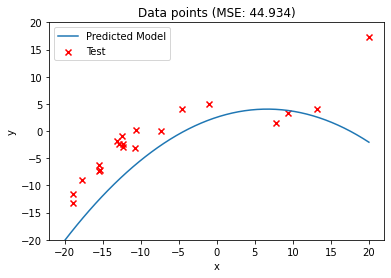

In [10]:
# Plotting polynomial and data points

# Range of X
x = np.linspace(-20, 20, 50)

# Plotting polynomial
plt.plot(x, polynomial.forward(x), label='Predicted Model')

# Plotting test data points
plt.scatter([i for idx, i in enumerate(X_test)], 
            [i for idx, i in enumerate(y_test)],
            label='Test', marker='x', color='r')

# Calculate MSE (Mean Square Error) of test data
mse = sum([(y - polynomial.forward(x))** 2 for x, y in zip(X_test, y_test)]) / len(X_test)

plt.title(f'Data points (MSE: {mse:0.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-20, 20])
plt.legend()
plt.show()

### 2-3) 다항 회귀 모델 분석 

2-2)를 수정하여 1차부터 4차 다항 회귀 모델 중 주어진 데이터셋을 가장 잘 표현하는 차수의 모델을 학습하고 결과를 시각화 하세요. **(4점, 부분점수 없음)**

- 2-2) 코드를 참고하여 작성합니다. (learning rate, dim, training epoch 등 변경)
- 다양한 시도를 통해 스스로 최적의 차수와 학습 조건을 찾아보세요. 
- 제출 시 MSE 기준 3 이하일 경우 정답으로 채점
- MSE 값이 nan 값인 경우 learning rate 파라메터를 조정하면 해결할 수 있습니다.

In [11]:
# Model define and training
    
# Define a model
polynomial = Polynomial(dim=3, lr=1e-8)  #  위에서 구현한 Polynomial regression model 모델 정의
    
# Training
polynomial.train(X_train, y_train, 100)   #  100 epoch 학습
    
# Print weight and bias
for i, weight in enumerate(polynomial.weights):
    print(f"weight_{i+1}: {weight:0.6f}")
print(f"bias: {polynomial.bias:0.6f}")

weight_1: 0.000843
weight_2: -0.002554
weight_3: 0.002165
bias: 2.499980


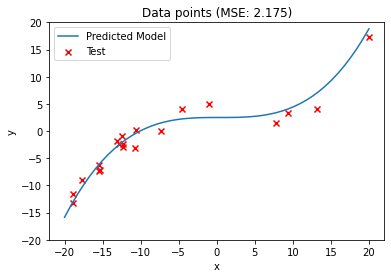

In [12]:
# Plotting polynomial and data points
    
# Range of X
x = np.linspace(-20, 20, 50)
    
# Plotting polynomial
plt.plot(x, polynomial.forward(x), label='Predicted Model')
    
# Plotting test data points
plt.scatter([i for idx, i in enumerate(X_test)],
            [i for idx, i in enumerate(y_test)],
            label='Test', marker='x', color='r')
    
# Calculate MSE (Mean Square Error) of test data
mse = sum([(y - polynomial.forward(x))** 2 for x, y in zip(X_test, y_test)]) / len(X_test)
    
plt.title(f'Data points (MSE: {mse:0.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-20, 20])
plt.legend()
plt.show()

## S2. Discussion

**1) 본 실습에서 구현한 `Polynomial` class는 Feature Normalization을 사용하지 않았습니다.**

1. 본 실습에서의 상황을 예시로 Feature Normalization을 수행하는 방법을 설명하고,

2. 수업 시간에 배운 내용을 기반으로 Feature Normalization을 수행했을 때의 효과에 대해서 논하세요.

[답변작성]:
1. 본실습에서 X는 rand()*i*0.5 - 20 for i in range(0,100) 으로 구성된 100개의 값이다. 따라서 항상 랜덤하게 값이 나오는데 현재의 값으로 진행하였을 때 최대값은 약 19 최솟값은 약 -20이 나왔었다. 여기서 Feature Normalization을 수행해줄 수 있는 방법은 값의 범위를 줄여주는 것이다.0에서 1사이의 범위로 만들어준다면, 더 빠른 속도로 수렴하여 진행될 수 있다. 0-1의 값으로 만들어 주기 위해 X의 모든값을 X의최솟값 만큼 더해준 후, 더한 후의 최댓값 만큼 나눠주면 0-1범위안으로 만들어 줄 수 있다.

2. Gradient의 경우 input값을 그대로 곱해주기 때문에 input값에 비례하게된다. 이때 만약 feature의 범위가 너무 크다면 gradient가 너무 커지게 되고 본 실습과 다르게 입력 feature가 두개 이상이라면 다른 feature 들과의 차이가 커서 최적값을 찾아가는데에 많은 시간이 소요된다. 이때 Feature Normalization을 수행해주면 입력 feature들의 범위가 일정해지고 보다 안정적으로 빠르게 최적값을 찾아갈 수 있다.

---